# Predicting Sentiment Based on Reviews Using Machine Learning

This notebook looks into usin various Python-based ML and data science libraties in an attempt to build a ML Model capable of predicting a positive or negative review. 

## 1. Problem Definition

In a statement, 
> Given movie review, can we predict positive or negative review

## 2. Data

> The original data came from https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews?resource=download. 

## 3. Evaluation

> If we can reach 95% accuracy at predicting whether or not a movie has positive or negative review during the proof of concept, we'll pursue the project.

## 4. Features

**Data Dictionary** 


    1. Review       Description of movie
    2. Sentiment    Positive or Negative 

In [6]:
import pandas as pd
import numpy as np

In [8]:
# Load CSV
df = pd.read_csv('/Users/alonsoortiz/Downloads/IMDB Dataset.csv')

# Preview
print(df.head(20)), print(df.shape)

                                               review sentiment
0   One of the other reviewers has mentioned that ...  positive
1   A wonderful little production. <br /><br />The...  positive
2   I thought this was a wonderful way to spend ti...  positive
3   Basically there's a family where a little boy ...  negative
4   Petter Mattei's "Love in the Time of Money" is...  positive
5   Probably my all-time favorite movie, a story o...  positive
6   I sure would like to see a resurrection of a u...  positive
7   This show was an amazing, fresh & innovative i...  negative
8   Encouraged by the positive comments about this...  negative
9   If you like original gut wrenching laughter yo...  positive
10  Phil the Alien is one of those quirky films wh...  negative
11  I saw this movie when I was about 12 when it c...  negative
12  So im not a big fan of Boll's work but then ag...  negative
13  The cast played Shakespeare.<br /><br />Shakes...  negative
14  This a fantastic movie of three pris

(None, None)

In [9]:
# Sentiment Counts
print(df['sentiment'].value_counts())

sentiment
positive    25000
negative    25000
Name: count, dtype: int64


In [10]:
# Get ReGex and Natural Language toolkit
import re
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/alonsoortiz/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
# Clean Text

def clean_text(text):
    text = re.sub(r'<.*?>', '', text)  # Remove HTML
    text = re.sub(r'[^a-zA-Z]', ' ', text) # Remove punctuation 
    words = text.lower().split()
    words = [w for w in words if w not in stop_words]
    return " ".join(words)

df['clean_review'] = df['review'].apply(clean_text)
df['label'] = df['sentiment'].map({'positive': 1, 'negative': 0})

In [14]:
# Vectorize Text (TF-IDF)

from sklearn.feature_extraction.text import TfidfVectorizer

# Instantiate TfidVectorizer
tfidf = TfidfVectorizer(max_features=5000)

# Feature and label
X = tfidf.fit_transform(df['clean_review'])
y = df['label']

In [15]:
# take a look at the dataset
df

,review,sentiment,clean_review,label
0,One of the other reviewers has mentioned that ...,positive,one reviewers mentioned watching oz episode ho...,1
1,A wonderful little production. <br /><br />The...,positive,wonderful little production filming technique ...,1
2,I thought this was a wonderful way to spend ti...,positive,thought wonderful way spend time hot summer we...,1
3,Basically there's a family where a little boy ...,negative,basically family little boy jake thinks zombie...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter mattei love time money visually stunnin...,1
...,...,...,...,...
49995,I thought this movie did a down right good job...,positive,thought movie right good job creative original...,1
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative,bad plot bad dialogue bad acting idiotic direc...,0
49997,I am a Catholic taught in parochial elementary...,negative,catholic taught parochial elementary schools n...,0
49998,I'm going to have to disagree with the previou...,negative,going disagree previous comment side maltin on...,0


### Train the model

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate model
model = LogisticRegression()

# Fit the model
model.fit(X_train, y_train)

# Model predictins based on untrained data (X_test)
y_pred = model.predict(X_test)

print('Accuracy:', f'{accuracy_score(y_test, y_pred):.2%}')

Accuracy: 89.13%


### Visualize

In [21]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[4347  614]
 [ 473 4566]]


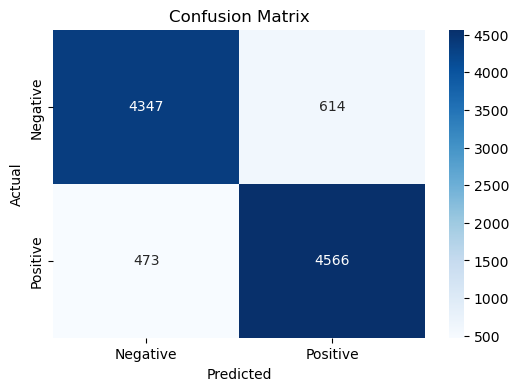

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt


# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot it
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### Classification Report

In [24]:
from sklearn.metrics import classification_report

In [26]:
print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=['Negative', 'Positive']))

Classification Report:

              precision    recall  f1-score   support

    Negative       0.90      0.88      0.89      4961
    Positive       0.88      0.91      0.89      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



## Summary

### IMDb Sentiment Classifier

Built a movie review sentiment classifier using a Kaggle IMDb dataset with 50,000 reviews. Performed data preprocessing (HTML tag removal, stopword filtering), applied TF-IDF vectorization, and trained a Logistic Regression model. Achieved an 89.13% accuracy. Included model evaluation via confusion matrix and classification report. Demonstrates proficiency in NLP, sklearn, and data visualization.

## Apply other models and evaluate

## Naive Bayes

In [39]:
from sklearn.naive_bayes import MultinomialNB

In [41]:
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

#Predict
y_pred_nb = nb_model.predict(X_test)
y_pred_nb

array([0, 1, 0, ..., 1, 0, 1])

### Confusion Matrix

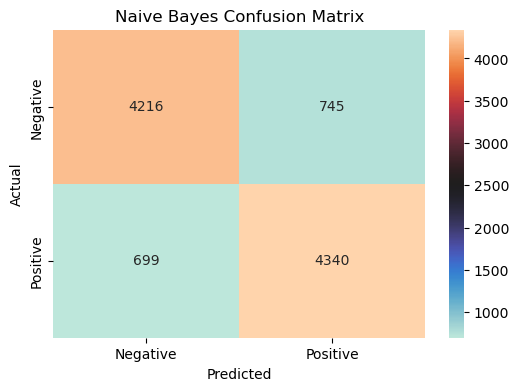

In [44]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm_nb = confusion_matrix(y_test, y_pred_nb)

plt.figure(figsize=(6,4))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='icefire',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Naive Bayes Confusion Matrix')
plt.show()

In [46]:
from sklearn.metrics import classification_report

In [48]:
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print('\nNaive Bayes Classificatin Report:\n')
print(classification_report(y_test, y_pred_nb, target_names=['Negative', 'Positive']))

Naive Bayes Accuracy: 0.8556

Naive Bayes Classificatin Report:

              precision    recall  f1-score   support

    Negative       0.86      0.85      0.85      4961
    Positive       0.85      0.86      0.86      5039

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



# Model comparisons

### Collect Metrics

In [52]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Logistic Regression Metrics
lr_accuracy = accuracy_score(y_test, y_pred)
lr_precision = precision_score(y_test, y_pred)
lr_recall = recall_score(y_test, y_pred)
lr_f1 = f1_score(y_test, y_pred)

# Naive Bayes Metrics
nb_accuracy = accuracy_score(y_test, y_pred_nb)
nb_precision = precision_score(y_test, y_pred_nb)
nb_recall = recall_score(y_test, y_pred_nb)
nb_f1 = f1_score(y_test, y_pred_nb)

### Side-by-Side Bar Chart

In [55]:
import matplotlib.pyplot as plt
import numpy as np

<function matplotlib.pyplot.show(close=None, block=None)>

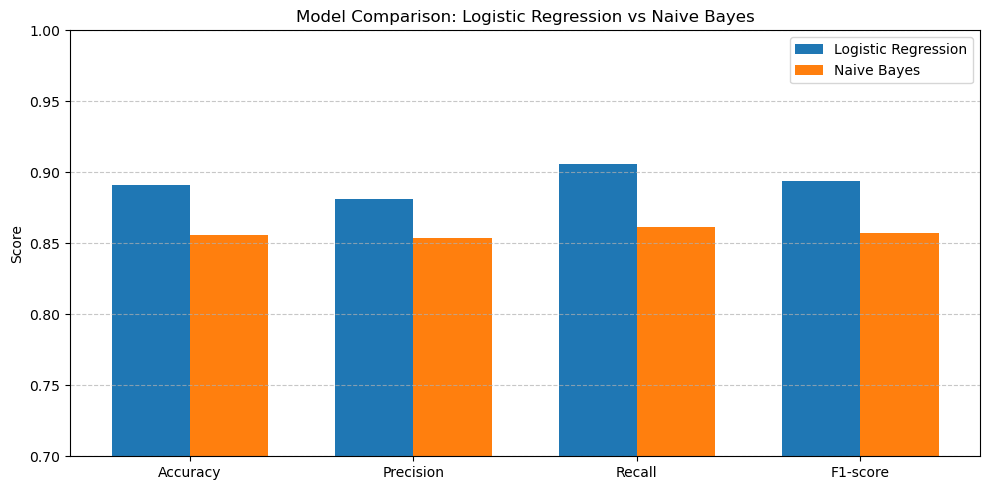

In [57]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
lr_scores = [lr_accuracy, lr_precision, lr_recall, lr_f1]
nb_scores = [nb_accuracy, nb_precision, nb_recall, nb_f1]

x = np.arange(len(metrics))
width = 0.35

plt.figure(figsize=(10,5), facecolor='white')
plt.bar(x - width/2, lr_scores, width, label='Logistic Regression')
plt.bar(x + width/2, nb_scores, width, label='Naive Bayes')
plt.xticks(x, metrics)
plt.ylim(0.7, 1.0)
plt.ylabel('Score')
plt.title('Model Comparison: Logistic Regression vs Naive Bayes')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show

## Support Vector Machine (SVM)

In [60]:
from sklearn.svm import LinearSVC

svm_model = LinearSVC()
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

# SVM metrics
svm_accuracy = accuracy_score(y_test, y_pred_svm)
svm_precision = precision_score(y_test, y_pred_svm)
svm_recall = recall_score(y_test, y_pred_svm)
svm_f1 = f1_score(y_test, y_pred_svm)

print("SVM Accuracy:", svm_accuracy)
print(classification_report(y_test, y_pred_svm))

SVM Accuracy: 0.8822
              precision    recall  f1-score   support

           0       0.89      0.87      0.88      4961
           1       0.88      0.89      0.88      5039

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



## Random Forest

In [62]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Random Forest metrics
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_precision = precision_score(y_test, y_pred_rf)
rf_recall = recall_score(y_test, y_pred_rf)
rf_f1 = f1_score(y_test, y_pred_rf)

print("Random Forest Accuracy:", rf_accuracy)
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.847
              precision    recall  f1-score   support

           0       0.84      0.86      0.85      4961
           1       0.86      0.83      0.85      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



In [64]:
import matplotlib.pyplot as plt
import numpy as np

# List of models and their metrics
models = ['LogReg', 'NaiveBayes', 'SVM', 'RandomForest']
accuracies = [lr_accuracy, nb_accuracy, svm_accuracy, rf_accuracy]
precisions = [lr_precision, nb_precision, svm_precision, rf_precision]
recalls = [lr_recall, nb_recall, svm_recall, rf_recall]
f1s = [lr_f1, nb_f1, svm_f1, rf_f1]

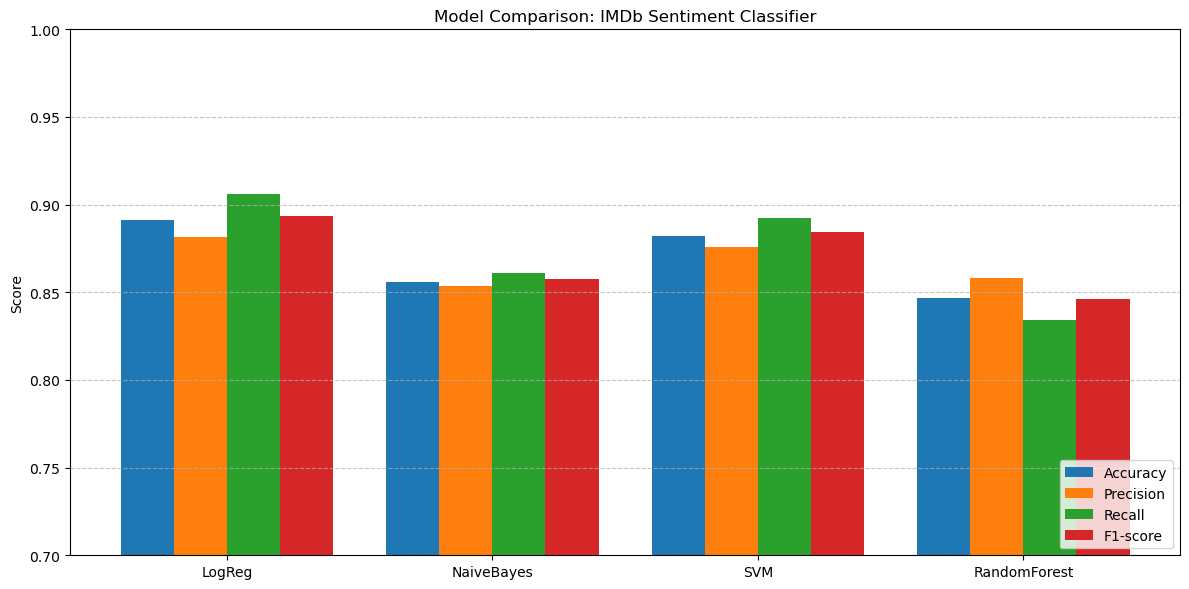

In [65]:
x = np.arange(len(models))  # the label locations
width = 0.2  # width of the bars

plt.figure(figsize=(12, 6))
plt.bar(x - 1.5*width, accuracies, width, label='Accuracy')
plt.bar(x - 0.5*width, precisions, width, label='Precision')
plt.bar(x + 0.5*width, recalls, width, label='Recall')
plt.bar(x + 1.5*width, f1s, width, label='F1-score')

plt.ylabel('Score')
plt.ylim(0.7, 1.0)
plt.title('Model Comparison: IMDb Sentiment Classifier')
plt.xticks(x, models)
plt.legend(loc='lower right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Conclusion

In this project, I build an evaluated a sentiment analysis model using hte IMDB Kaggle dataset, consisting of 50,000 labeled movie reviews. I applied NLP techniques such as HTML tag removal, stopword filtering, and TF_IDF vectorization to process teh data.
I trained and compared four supervised learning models evaluation metrics like`accuracy`, `precision`, `recall`, and `F1-score`: 
1. **Logistic Regression**,
2. **Naive Bayes**,
3. **Suport Vector Machine** (SVM), and
4. **Random Forestusing**

Overall, **Logistic Regression** achieved thte highest performace with **89.13%** `accuracy` while balancing `precision` and `recall` effectively. **Naive Bayes** and **SVM** were competevite, while **Random Forest** did not offer strong accuracy and was substantially resource intensive. This project, albeit rudimentary and succinct, demonstrates my ability to perform end-to-end NLP modeling, evaluate multiple algorithms, and communicate insights through visualization and structured analysis. 